Movie Recommender System

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import datasets
movies = pd.read_csv(r"F:\mal datasets\movie\tmdb_5000_movies.csv")
credits = pd.read_csv(r"F:\mal datasets\movie\tmdb_5000_credits.csv")

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movies = movies.merge(credits, on='title')

In [7]:
movies.shape

(4809, 23)

In [8]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [10]:
movies = movies[['id','genres','title','keywords','overview','tagline','cast','crew']]

In [11]:
movies.head(1)

,id,genres,title,keywords,overview,tagline,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


<Axes: >

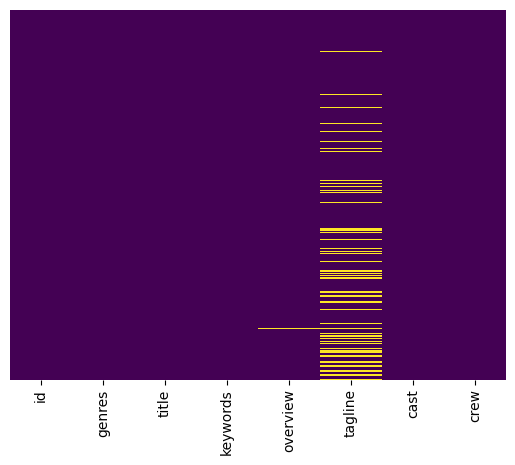

In [12]:
sns.heatmap(movies.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [13]:
movies.drop(columns= ['tagline'],inplace=True)

In [14]:
movies.dropna(inplace=True)

In [15]:
movies.isnull().sum()

id          0
genres      0
title       0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4806 non-null   int64 
 1   genres    4806 non-null   object
 2   title     4806 non-null   object
 3   keywords  4806 non-null   object
 4   overview  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


In [17]:
movies['genres'].iloc[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [18]:
import ast

In [19]:
def convert(obj):
    g_list = []
    for i in ast.literal_eval(obj):
        g_list.append(i['name'])
    return g_list

In [20]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

In [21]:
movies['crew'].iloc[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [22]:
movies.head(1)

,id,genres,title,keywords,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [23]:
def castout(obj):
    g_list = []
    n = 0
    for i in ast.literal_eval(obj):
        g_list.append(i['name'])
        n +=1
        if n == 3:
            break
    return g_list

In [24]:
movies['cast'] = movies['cast'].apply(castout)

In [25]:
def director(obj):
    for i in ast.literal_eval(obj):
        if i.get("job")== "Director":
            return i.get('name')
            break

In [26]:
movies['crew'] = movies['crew'].apply(director)

In [27]:
movies.tail()

,id,genres,title,keywords,overview,cast,crew
4804,9367,"[Action, Crime, Thriller]",El Mariachi,"[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez
4805,72766,"[Comedy, Romance]",Newlyweds,[],A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",Edward Burns
4806,231617,"[Comedy, Drama, Romance, TV Movie]","Signed, Sealed, Delivered","[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...","[Eric Mabius, Kristin Booth, Crystal Lowe]",Scott Smith
4807,126186,[],Shanghai Calling,[],When ambitious New York attorney Sam is sent t...,"[Daniel Henney, Eliza Coupe, Bill Paxton]",Daniel Hsia
4808,25975,[Documentary],My Date with Drew,"[obsession, camcorder, crush, dream girl]",Ever since the second grade when he first saw ...,"[Drew Barrymore, Brian Herzlinger, Corey Feldman]",Brian Herzlinger


In [28]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [29]:
movies['crew'] = movies['crew'].fillna('').apply(lambda x: x.split())

In [30]:
movies.head()

,id,genres,title,keywords,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[James, Cameron]"
1,285,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Gore, Verbinski]"
2,206647,"[Action, Adventure, Crime]",Spectre,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Sam, Mendes]"
3,49026,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]","[Christopher, Nolan]"
4,49529,"[Action, Adventure, Science Fiction]",John Carter,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Andrew, Stanton]"


In [31]:
movies['tags'] = movies.apply(lambda x : x['genres'] + x['keywords'] + x['overview'] + x['cast'] + x['crew'], axis= 1)

In [32]:
movies = movies[['id','title','tags']]

In [33]:
movies['tags'].iloc[0]

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'James',
 'Cameron']

In [34]:
movies['tags'] = movies['tags'].apply(lambda x: [i.replace(' ','') for i in x])

In [35]:
movies['tags'] = movies['tags'].apply(lambda x:" ".join(x))

In [36]:
movies['tags'].iloc[0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver James Cameron'

In [37]:
#lower case
movies['tags'] = movies['tags'].apply(lambda x: x.lower())

In [38]:
movies.head(1)

,id,title,tags
0,19995,Avatar,action adventure fantasy sciencefiction cultur...


In [39]:
import nltk

In [40]:
from nltk.stem.porter import PorterStemmer
sm = PorterStemmer()

In [41]:
def stem_tag(tag):
    return " ".join([sm.stem(i) for i in tag.split()])

In [42]:
movies['tags'] = movies['tags'].apply(stem_tag)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer(stop_words='english',max_features=5000)

In [45]:
vect = vectorizer.fit_transform(movies['tags']).toarray()

In [46]:
vect.shape

(4806, 5000)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity = cosine_similarity(vect)

In [49]:
similarity

array([[1.        , 0.08226127, 0.08471737, ..., 0.04456565, 0.        ,
        0.        ],
       [0.08226127, 1.        , 0.05884899, ..., 0.02321817, 0.        ,
        0.02465568],
       [0.08471737, 0.05884899, 1.        , ..., 0.0239114 , 0.0492366 ,
        0.        ],
       ...,
       [0.04456565, 0.02321817, 0.0239114 , ..., 1.        , 0.03885143,
        0.04007219],
       [0.        , 0.        , 0.0492366 , ..., 0.03885143, 1.        ,
        0.0825137 ],
       [0.        , 0.02465568, 0.        , ..., 0.04007219, 0.0825137 ,
        1.        ]])

In [50]:
movies.head()

,id,title,tags
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...


In [51]:
def recommend(movie):
    if movie in movies['title'].values:
        movie_ind = movies[movies['title'] == movie].index[0]
        rec_movie = sorted(list(enumerate(similarity[movie_ind])), reverse=True, key=lambda x: x[1])[1:6]
        for i in rec_movie:
            print(movies['title'].iloc[i[0]])
    else:
        print("Sorry, we don't have that movie in our database.")

In [52]:
movies['title'].head(10)

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
6                                     Tangled
7                     Avengers: Age of Ultron
8      Harry Potter and the Half-Blood Prince
9          Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [53]:
print(recommend("Pirates of the Caribbean: The Curse of the Black Pearl"))

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: At World's End
Pirates of the Caribbean: On Stranger Tides
VeggieTales: The Pirates Who Don't Do Anything
The Pirates! In an Adventure with Scientists!
None
